### Start

In [197]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import argparse
import os
import glob
import re

In [198]:
global_historys = list()
saved_files = list()
plot_labels = list()

In [199]:
def float_range(mini, maxi):
    """Return function handle of an argument type function for 
       ArgumentParser checking a float range: mini <= arg <= maxi
         mini - minimum acceptable argument
         maxi - maximum acceptable argument"""

    # Define the function with default arguments
    def float_range_checker(arg):
        """New Type function for argparse - a float within predefined range."""

        try:
            f = float(arg)
        except ValueError:    
            raise argparse.ArgumentTypeError("must be a floating point number")
        if f < mini or f > maxi:
            raise argparse.ArgumentTypeError("must be in range [" + str(mini) + " .. " + str(maxi)+"]")
        return f

    # Return function handle to checking function
    return float_range_checker

In [200]:
parser = argparse.ArgumentParser(prog="plot_saved_log.py 'file1.npz' 'label1' 'file2.npz' 'label2' ... ",
                                 description="Plotting saved log from '.npz' format",
                                 epilog="Written by Ali Bozorgzad for comparing results")

parser.add_argument("--plot_title", "-i", dest="plot_title", type=str, default="Loss/Acc on data",
                    help="plot title, put it between \"name\"")
parser.add_argument("--plot_selection", "-s", dest="plot_selection", type=str, default="accuracy",
                    help="select your plot", choices=['loss', 'accuracy'])
parser.add_argument("--xlabel", "-x", dest="xlabel", type=str, default="Epochs",
                    help="set the xlabel for plot, put it between \"name\"")
parser.add_argument("--ylabel", "-y", dest="ylabel", type=str, default="Loss/Acc",
                    help="set the ylabel for plot, put it between \"name\"")
parser.add_argument("--root_path", "-p", dest="root_path", type=str, default="save_log",
                    help="root path of the '*.npz' files, put it between \"name\"")
parser.add_argument("--xlim_left", "-l", dest="xlim_left", type=str, default="None",
                    help="set x limit left for plot, None or number")
parser.add_argument("--xlim_right", "-r", dest="xlim_right", type=str, default="None",
                    help="set x limit right for plot, None or number")
parser.add_argument("--ylim_bottom", "-b", dest="ylim_bottom", type=str, default="None",
                    help="set y limit bottom for plot, None or number")
parser.add_argument("--ylim_top", "-t", dest="ylim_top", type=str, default="None",
                    help="set y limit top for plot, None or number")
parser.add_argument("--plot_save_name", "-n", dest="plot_save_name", type=str, default="NONE",
                    help="plots will be saved, if you set this, put it between \"name\"")
parser.add_argument("--show_plot", "-o", dest="show_plot", type=int, default="1",
                    help="set '0', if u want to not showing plot", choices=[0, 1])
parser.add_argument("--plot_dpi", "-d", dest="plot_dpi", type=float_range(10, 1000), default="100",
                    help="set dpi for plotting figures, between [10...1000]")
parser.add_argument("--colors", "-c", dest="colors", type=lambda y:re.split(' |, ', y), default="NONE",
                    help="set color for each plot in order, like: \"red, #00FF00, b, C1, C2, ...\"")


args, unknown = parser.parse_known_args()
plot_title = args.plot_title
plot_selection = args.plot_selection
xlabel = args.xlabel
ylabel = args.ylabel
root_path = args.root_path
xlim_left = args.xlim_left
xlim_right = args.xlim_right
ylim_bottom = args.ylim_bottom
ylim_top = args.ylim_top
plot_save_name = args.plot_save_name
show_plot = args.show_plot
plot_dpi = args.plot_dpi
colors = args.colors
matplotlib.rcParams["figure.dpi"] = plot_dpi


for i, arg in enumerate(unknown):
    if i % 2 == 0:
        saved_files.append(arg)
    else:
        plot_labels.append(arg)

In [201]:
# set parameters (Manual)
saved_files = list()
plot_labels = list()

saved_files.append("FSS_MNIST_MLP1_cka_linear_best_10c_32b_1.0cp_1.0sp_normal_1rs_0.001lr_1ce_1pes_5_3_step_1049.npz")
saved_files.append("FSS_MNIST_MLP1_cka_rbf_best_10c_32b_1.0cp_1.0sp_normal_1rs_0.001lr_1ce_1pes_5_3_step_1049.npz")
saved_files.append("FSS_MNIST_MLP1_dcka_best_10c_32b_1.0cp_1.0sp_normal_1rs_0.001lr_1ce_1pes_5_3_step_1049.npz")
saved_files.append("FSS_MNIST_MLP1_sum_diff_best_10c_32b_1.0cp_1.0sp_normal_1rs_0.001lr_1ce_1pes_5_3_step_1049.npz")
saved_files.append("FSS_MNIST_MLP1_cca_best_10c_32b_1.0cp_1.0sp_normal_1rs_0.001lr_1ce_1pes_5_3_step_1049.npz")
saved_files.append("FA_MNIST_MLP1_10c_32b_1.0cp_normal_1rs_0.001lr_1ce_step_1049.npz")
saved_files.append("FS_MNIST_MLP1_10c_32b_1.0cp_1.0sp_normal_1rs_0.001lr_1ce_1pes_5_3_step_1049.npz")

plot_labels.append("linear")
plot_labels.append("rbf")
plot_labels.append("dcka")
plot_labels.append("diff")
plot_labels.append("cca")
plot_labels.append("FA")
plot_labels.append("FS")

plot_title = "Loss/Acc on data"
plot_selection = "accuracy"
xlabel = "Epochs"
ylabel = "Loss/Acc"
root_path = r"D:\SSD_Optimization\User\Desktop\save_log\MNIST_log"
xlim_left = "None"
xlim_right = "None"
ylim_bottom = "None"
ylim_top = "None"
plot_save_name = "NONE"
show_plot = 1
matplotlib.rcParams["figure.dpi"] = 100
colors = ["NONE"]

In [202]:
def change_type(variable):
    if variable == "None":
        return None
    else:
        return float(variable)


xlim_left = change_type(xlim_left)
xlim_right = change_type(xlim_right)
ylim_bottom = change_type(ylim_bottom)
ylim_top = change_type(ylim_top)

In [203]:
# Check correctness
for sf in saved_files:
    file_path = os.path.join(root_path, sf)
    file_name = sorted(glob.glob(file_path+"*"), key=os.path.getmtime)
    if len(file_name) == 0:
        raise Exception(f"File not found! '{file_path}'")
    
    print(file_name[0].split("\\")[-1])
    npzFile = np.load(file_name[0], allow_pickle=True)
    global_historys.append(npzFile["global_history"].item())
    npzFile.close()


if colors[0] != "NONE":
    if len(colors) != len(saved_files):
        raise Exception("The length of the colors and files must be the same.")

FSS_MNIST_MLP1_cka_linear_best_10c_32b_1.0cp_1.0sp_normal_1rs_0.001lr_1ce_1pes_5_3_step_1049.npz
FSS_MNIST_MLP1_cka_rbf_best_10c_32b_1.0cp_1.0sp_normal_1rs_0.001lr_1ce_1pes_5_3_step_1049.npz
FSS_MNIST_MLP1_dcka_best_10c_32b_1.0cp_1.0sp_normal_1rs_0.001lr_1ce_1pes_5_3_step_1049.npz
FSS_MNIST_MLP1_sum_diff_best_10c_32b_1.0cp_1.0sp_normal_1rs_0.001lr_1ce_1pes_5_3_step_1049.npz
FSS_MNIST_MLP1_cca_best_10c_32b_1.0cp_1.0sp_normal_1rs_0.001lr_1ce_1pes_5_3_step_1049.npz
FA_MNIST_MLP1_10c_32b_1.0cp_normal_1rs_0.001lr_1ce_step_1049.npz
FS_MNIST_MLP1_10c_32b_1.0cp_1.0sp_normal_1rs_0.001lr_1ce_1pes_5_3_step_1049.npz


### Loss/Acc

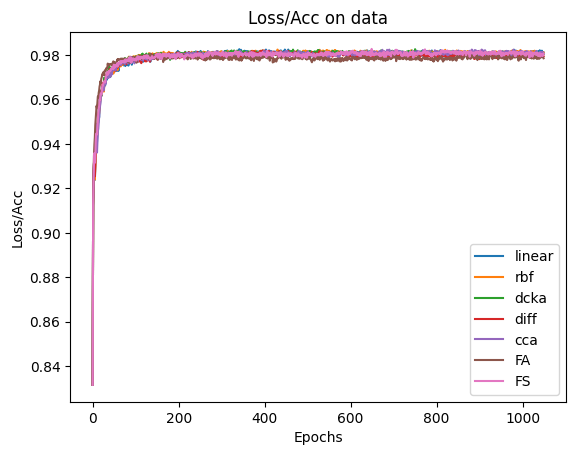

In [204]:
for i, gh in enumerate(global_historys):
    length = len(gh[plot_selection])
    if colors[0] == "NONE":
        # or can fill the list with 'colors = ["C1", "C2", ...]'
        plt.plot(range(length), gh[plot_selection], label=plot_labels[i])
    else:
        plt.plot(range(length), gh[plot_selection], label=plot_labels[i], color=colors[i])
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(plot_title)
plt.xlim(left=xlim_left, right=xlim_right)
plt.ylim(bottom=ylim_bottom, top=ylim_top)
plt.legend()

if plot_save_name != 'NONE':
    file_path = os.path.join(root_path, plot_save_name)
    plt.savefig(f"{file_path}_{plot_selection}.jpg")

if show_plot:
    plt.show()